@author: Rosa Chaves 

# TASK 1: DATA EXPLORATION AND CLEANING

# 1. DOWNLOAD AND ASSES THE DATA

Yellow cab data from the months of March, June and November (2017) has been used. Data from these files is concatenated in the dataframe named "df". First lines of raw data are shown.


In [1]:
from glob import glob
import os
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font='sans')

all_files=glob("/Users/rosa/Desktop/CARTOTask/*.csv") #it grabs all the csv files from the directory 
f1=all_files[0]
f2=all_files[1]
f3=all_files[2]
df=pd.concat(pd.read_csv(f) for f in all_files)
df.head() #it depicts the first lines of code


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,2017-03-09 21:30:11,2017-03-09 21:44:20,1,4.06,1,N,148,48,1,14.0,0.5,0.5,3.06,0.0,0.3,18.36
1,2,2017-03-09 21:47:00,2017-03-09 21:58:01,1,2.73,1,N,48,107,2,11.5,0.5,0.5,0.00,0.0,0.3,12.80
2,2,2017-03-09 22:01:08,2017-03-09 22:11:16,1,2.27,1,N,79,162,1,10.0,0.5,0.5,2.82,0.0,0.3,14.12
3,2,2017-03-09 22:16:05,2017-03-10 06:26:11,1,3.86,1,N,237,41,1,12.0,0.5,0.5,3.99,0.0,0.3,17.29
4,2,2017-03-31 06:31:53,2017-03-31 06:41:48,1,3.45,1,N,41,162,2,12.0,0.5,0.5,0.00,0.0,0.3,13.30


# 2. IDENTIFY AND DOCUMENT ANY ISSUES WITH THE DATA

In order to make a first exploration of data, some bar diagrams are shown.
For example, as the vendor is concerned the number of trips is similarly distributed.

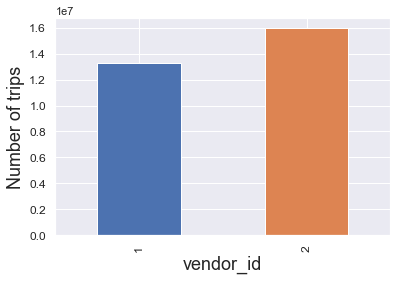

In [2]:
ax = df.groupby(['VendorID']).size().plot(kind='bar')
ax.set_xlabel('vendor_id', fontsize=18)
ax.set_ylabel('Number of trips', fontsize=18)
ax.tick_params(labelsize=12)

With regards to the "payment_type", the records come from credit card, followed by cash. It is interesting to observe that the payment type "card" has a tip amount while this feature is always 0 in the case of cash. We will use this information for building and testing the model as explained in next sections. The reality is that cash tip might induce to fraud.

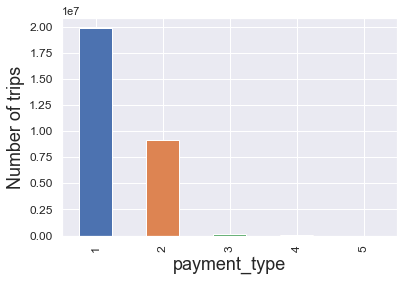

In [3]:
ax = df.groupby(['payment_type']).size().plot(kind='bar')

ax.set_xlabel('payment_type', fontsize=18)
ax.set_ylabel('Number of trips', fontsize=18)
ax.tick_params(labelsize=12)

In the following, a raw data description with some statistical measurements as the mean, std, min, max, quantiles etc

In [4]:
df.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.923642e+07,2.923642e+07,2.923642e+07,2.923642e+07,2.923642e+07,2.923642e+07,2.923642e+07,2.923642e+07,2.923642e+07,2.923642e+07,2.923642e+07,2.923642e+07,2.923642e+07,2.923642e+07
mean,1.545904e+00,1.617798e+00,2.919386e+00,1.043350e+00,1.632024e+02,1.611910e+02,1.329500e+00,1.310930e+01,3.339407e-01,4.973104e-01,1.874055e+00,3.290113e-01,2.996283e-01,1.644710e+01
std,4.978884e-01,1.260992e+00,4.476535e+00,5.095108e-01,6.661417e+01,7.047819e+01,4.903471e-01,1.472817e+02,4.615744e-01,7.081708e-02,2.645570e+00,1.968881e+00,1.408904e-02,1.475248e+02
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-5.500000e+02,-5.371000e+01,-5.000000e-01,-1.120000e+02,-1.750000e+01,-3.000000e-01,-5.503000e+02
25%,1.000000e+00,1.000000e+00,9.700000e-01,1.000000e+00,1.140000e+02,1.070000e+02,1.000000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,8.750000e+00
50%,2.000000e+00,1.000000e+00,1.600000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,9.500000e+00,0.000000e+00,5.000000e-01,1.360000e+00,0.000000e+00,3.000000e-01,1.180000e+01
75%,2.000000e+00,2.000000e+00,3.010000e+00,1.000000e+00,2.330000e+02,2.330000e+02,2.000000e+00,1.450000e+01,5.000000e-01,5.000000e-01,2.460000e+00,0.000000e+00,3.000000e-01,1.780000e+01
max,2.000000e+00,1.920000e+02,9.496980e+03,9.900000e+01,2.650000e+02,2.650000e+02,5.000000e+00,6.304618e+05,6.980000e+01,1.400000e+02,4.500000e+02,1.018950e+03,1.000000e+00,6.304631e+05


For example, it is observed that the toll quantity can have a variability of 6.32 dollards that indicates a possible correlation between the regions of pickup and dropoff (PULocationID, DOLocationID) that could be studied. Maybe if the toll is high, the tip decreases (things like that)

In [5]:
tolls = df.groupby(['tolls_amount']).size()
tolls.describe()

count    1.918000e+03
mean     1.524318e+04
std      6.329652e+05
min      1.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      6.000000e+00
max      2.769738e+07
dtype: float64

0.30 dollars of improvement surcharge assessed trips at the flag drop. The improvement surcharge began being lived in 2015. As data is of 2017, every taxi should have 0.30 or 0 (possible fraud). The rest of values must me cleaned in the following section.

In [6]:
isurcharge = df.groupby(['improvement_surcharge']).size()

In [7]:
isurcharge

improvement_surcharge
-0.30       14038
 0.00        8216
 0.25          10
 0.30    29214128
 0.50           2
 0.55           1
 1.00          29
dtype: int64

Store_and_fwd_flag is a feature that can be eliminated as it does not add any interesting information for the model (it is always "no")

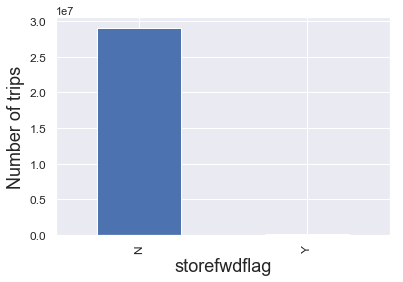

In [8]:
ax = df.groupby(['store_and_fwd_flag']).size().plot(kind='bar')

ax.set_xlabel('storefwdflag', fontsize=18)
ax.set_ylabel('Number of trips', fontsize=18)
ax.tick_params(labelsize=12)

In [ ]:
fares=df.groupby(['fare_amount']).size()


Fare_amount contains negative values. This must be cleaned in the next section

In [89]:
mtax=df.groupby(['mta_tax']).size()
mtax.head()

mta_tax
-0.50     13639
 0.00    133414
 0.25        62
 0.32         4
 0.35         3
dtype: int64

As mta_tax is concerned, 0.5 dollars is automatically triggered for a meter rate in use. In order to construct a clean model in which it does exist a correlation with the trip duration, regions of picking and dropoff etc. just 0.5 will be considered. One can see more details in the cleaning part.

# Date and time obtaining

The date and time format is not easy to drive with the raw format. The function calculate_datetime_extra, obtains the pick and drop hour (this can be interesting for further studies of busy hour in New York). The month is also interesting (maybe in a summer month there is less traffic or the tips are higher for some reason. This correlations could be studied in more detail, for instance). 

In [11]:
column_pickup='tpep_pickup_datetime'
column_dropoff='tpep_dropoff_datetime'

def calculate_datetime_extra(column_pickup, column_dropoff):
    rng=pd.DataFrame()
    rng['date']=df[column_pickup]
    df['Time'] = pd.to_datetime(rng['date']) 
    month1=df['Time'].dt.month
    day1=df['Time'].dt.day
    hour1=df['Time'].dt.hour
    minute1=df['Time'].dt.minute
    rng['date']=df[column_dropoff]
    df['Time'] = pd.to_datetime(rng['date'])
    month2=df['Time'].dt.month
    day2=df['Time'].dt.day
    hour2=df['Time'].dt.hour
    minute2=df['Time'].dt.minute
    newdate = pd.concat([hour1,minute1,hour2,minute2,month1],axis=1, join='inner')
    newdate.columns=['hpick','mpick','hdrop','mdrop','month']
    return newdate


In [12]:
times=calculate_datetime_extra(column_pickup, column_dropoff)
times.head(2)

,hpick,mpick,hdrop,mdrop,month
0,21,30,21,44,3
1,21,47,21,58,3


This new feature will be added to the cleaned dataset: trip duration. Maybe, a busy executive appreciates to arrive at his destiny in a shorter period.

In [13]:
#this function calculates the duration of a taxi ride in minutes
def calculate_duration(times):
    duration=abs(times['hdrop']-times['hpick'])*60+abs(times['mdrop']-times['mpick'])
    nextday = ((times['hpick'] >12) & (times['hdrop'] < 12))    
    duration[nextday]=abs(times['hdrop']+24-times['hpick'])*60+abs(times['mdrop']-times['mpick']) 
    return duration   

In [14]:
duration=calculate_duration(times)
durationdate=pd.concat([times,duration],axis=1, join='inner')
durationdate.columns=['hpick','mpick','hdrop','mdrop','month','duration']

In [15]:
durationdate.head(3)

,hpick,mpick,hdrop,mdrop,month,duration
0,21,30,21,44,3,14
1,21,47,21,58,3,11
2,22,1,22,11,3,10


In [16]:
newdf=pd.concat([durationdate,df],axis=1, join='inner')
newdf.head(2)

,hpick,mpick,hdrop,mdrop,month,duration,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,...,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,Time
0,21,30,21,44,3,14,2,2017-03-09 21:30:11,2017-03-09 21:44:20,1,...,48,1,14.0,0.5,0.5,3.06,0.0,0.3,18.36,2017-03-09 21:44:20
1,21,47,21,58,3,11,2,2017-03-09 21:47:00,2017-03-09 21:58:01,1,...,107,2,11.5,0.5,0.5,0.00,0.0,0.3,12.80,2017-03-09 21:58:01


# 3. DOCUMENT HOW YOU RESOLVED THESE ISSUES

Taking into account all the analysis done above, we can clean the database with the range explained in the following.In order to construct a reliable model, i will just use payment_type card because we have registered the tip. And in a test phase, I will use cash data to see performance results, possible causes of fraud etc. 

In [17]:

payment_type = (newdf.payment_type == 1) #payment_type=2 (cash) has a tip of 0 always, so it will add noise to the model
fare_amount = ((newdf.fare_amount >= 5.0) & (newdf.fare_amount <= 500.0))
surcharge = ((newdf.improvement_surcharge == 0.0) | (newdf.improvement_surcharge == 0.3))
mta_tax = (newdf.mta_tax == 0.5)
tip_amount = ((newdf.tip_amount >= 0.0) & (newdf.tip_amount <= 100.0))
tolls_amount = ((newdf.tolls_amount >= 0.0) & (newdf.tolls_amount <= 30.0))

newdf.describe()

,hpick,mpick,hdrop,mdrop,month,duration,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.923642e+07,2.923642e+07,2.923642e+07,2.923642e+07,2.923642e+07,2.923642e+07,2.923642e+07,2.923642e+07,2.923642e+07,2.923642e+07,2.923642e+07,2.923642e+07,2.923642e+07,2.923642e+07,2.923642e+07,2.923642e+07,2.923642e+07,2.923642e+07,2.923642e+07,2.923642e+07
mean,1.369903e+01,2.955795e+01,1.371382e+01,2.962155e+01,6.531522e+00,3.253904e+01,1.545904e+00,1.617798e+00,2.919386e+00,1.043350e+00,1.632024e+02,1.611910e+02,1.329500e+00,1.310930e+01,3.339407e-01,4.973104e-01,1.874055e+00,3.290113e-01,2.996283e-01,1.644710e+01
std,6.257811e+00,1.733013e+01,6.347263e+00,1.741154e+01,3.290276e+00,3.922124e+01,4.978884e-01,1.260992e+00,4.476535e+00,5.095108e-01,6.661417e+01,7.047819e+01,4.903471e-01,1.472817e+02,4.615744e-01,7.081708e-02,2.645570e+00,1.968881e+00,1.408904e-02,1.475248e+02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-5.500000e+02,-5.371000e+01,-5.000000e-01,-1.120000e+02,-1.750000e+01,-3.000000e-01,-5.503000e+02
25%,9.000000e+00,1.500000e+01,9.000000e+00,1.500000e+01,3.000000e+00,7.000000e+00,1.000000e+00,1.000000e+00,9.700000e-01,1.000000e+00,1.140000e+02,1.070000e+02,1.000000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,8.750000e+00
50%,1.400000e+01,3.000000e+01,1.400000e+01,3.000000e+01,6.000000e+00,1.300000e+01,2.000000e+00,1.000000e+00,1.600000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,9.500000e+00,0.000000e+00,5.000000e-01,1.360000e+00,0.000000e+00,3.000000e-01,1.180000e+01
75%,1.900000e+01,4.500000e+01,1.900000e+01,4.500000e+01,1.100000e+01,3.800000e+01,2.000000e+00,2.000000e+00,3.010000e+00,1.000000e+00,2.330000e+02,2.330000e+02,2.000000e+00,1.450000e+01,5.000000e-01,5.000000e-01,2.460000e+00,0.000000e+00,3.000000e-01,1.780000e+01
max,2.300000e+01,5.900000e+01,2.300000e+01,5.900000e+01,1.200000e+01,1.439000e+03,2.000000e+00,1.920000e+02,9.496980e+03,9.900000e+01,2.650000e+02,2.650000e+02,5.000000e+00,6.304618e+05,6.980000e+01,1.400000e+02,4.500000e+02,1.018950e+03,1.000000e+00,6.304631e+05


In the clean dataframe named "newdf", columns as minutes of picking/dropoff, store_and_fwd_flag etc will not be considered. The month, duration, hour of picking/dropping will be added. The day information has not been added as I am not considering holidays, weekends or workdays in my studies. Undoubtedly this could be interesting to take into account in the future.

In [18]:
# Let's save it in another variable.
newdf.drop(newdf.columns[[1,3,7,8,12,23]],axis=1,inplace=True)
data_aux = newdf[payment_type & fare_amount & surcharge & mta_tax & tip_amount & tolls_amount]

payment_type = None
fare_amount = None
surcharge = None
mta_tax = None
tip_amount = None
tolls_amount = None

data_aux.head(3)

,hpick,hdrop,month,duration,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,21,21,3,14,2,1,4.06,1,148,48,1,14.0,0.5,0.5,3.06,0.0,0.3,18.36
2,22,22,3,10,2,1,2.27,1,79,162,1,10.0,0.5,0.5,2.82,0.0,0.3,14.12
3,22,6,3,490,2,1,3.86,1,237,41,1,12.0,0.5,0.5,3.99,0.0,0.3,17.29


# TASK 2: DATA SUMMARY

Taking into account all the comments done above we can appreciate that the different feature show a better structured and cleaner statistical meaning.

In [19]:
data_aux.describe()

,hpick,hdrop,month,duration,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,1.842604e+07,1.842604e+07,1.842604e+07,1.842604e+07,1.842604e+07,1.842604e+07,1.842604e+07,1.842604e+07,1.842604e+07,1.842604e+07,18426040.0,1.842604e+07,1.842604e+07,18426040.0,1.842604e+07,1.842604e+07,1.842604e+07,1.842604e+07
mean,1.381862e+01,1.382218e+01,6.545641e+00,3.525725e+01,1.548863e+00,1.607601e+00,3.206349e+00,1.033280e+00,1.630370e+02,1.610178e+02,1.0,1.397262e+01,3.426913e-01,0.5,2.827502e+00,3.594089e-01,2.999880e-01,1.830794e+01
std,6.305617e+00,6.409683e+00,3.295344e+00,3.938123e+01,4.976067e-01,1.258418e+00,3.776484e+00,3.225208e-01,6.586966e+01,6.989433e+01,0.0,1.095396e+01,4.642061e-01,0.0,2.554994e+00,1.420090e+00,1.893410e-03,1.407693e+01
min,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.0,5.000000e+00,-5.000000e-01,0.5,0.000000e+00,0.000000e+00,0.000000e+00,5.500000e+00
25%,9.000000e+00,9.000000e+00,3.000000e+00,8.000000e+00,1.000000e+00,1.000000e+00,1.140000e+00,1.000000e+00,1.140000e+02,1.120000e+02,1.0,7.500000e+00,0.000000e+00,0.5,1.460000e+00,0.000000e+00,3.000000e-01,9.960000e+00
50%,1.500000e+01,1.500000e+01,6.000000e+00,1.500000e+01,2.000000e+00,1.000000e+00,1.830000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.0,1.050000e+01,0.000000e+00,0.5,2.050000e+00,0.000000e+00,3.000000e-01,1.355000e+01
75%,1.900000e+01,1.900000e+01,1.100000e+01,6.700000e+01,2.000000e+00,2.000000e+00,3.400000e+00,1.000000e+00,2.330000e+02,2.330000e+02,1.0,1.600000e+01,5.000000e-01,0.5,3.160000e+00,0.000000e+00,3.000000e-01,2.015000e+01
max,2.300000e+01,2.300000e+01,1.200000e+01,1.439000e+03,2.000000e+00,1.920000e+02,7.025000e+02,9.900000e+01,2.650000e+02,2.650000e+02,1.0,4.990000e+02,1.000000e+01,0.5,1.000000e+02,3.000000e+01,3.000000e-01,5.124200e+02


# Map representation

As previously commented, location information is important to understand and correlate which are the busy regions in which the most of the traffic happens: for this database Manhattan seems to be the one in which more pickings and dropoffs happen.

In [20]:
ax = df.groupby(['PULocationID']).size()
newax=(ax>=1159313) #50% of the histogram is the PULocationIDs most repeated
ax[newax]

PULocationID
237    1159313
dtype: int64

In [21]:
ax2 = df.groupby(['DOLocationID']).size()
ax2.describe()

count    2.630000e+02
mean     1.111651e+05
std      2.234807e+05
min      1.000000e+00
25%      2.274500e+03
50%      6.299000e+03
75%      7.779250e+04
max      1.090520e+06
dtype: float64

In [22]:
newax2=(ax2>=1090510)
ax2[newax2]

DOLocationID
236    1090520
dtype: int64

Location 236 (the most repeated DOLocationID) and 237 (the most repeated PULocationID) correspond to Manhattan (as shown below in the arc file). We depict in a map the areas inside Manhattan Location.

In [23]:
import geopandas as gpd
gdf = gpd.read_file('/Users/rosa/Desktop/CARTOTask/taxi_zones.shp')
print (gdf)

     OBJECTID  Shape_Leng  Shape_Area                                 zone  \
0           1    0.116357    0.000782                       Newark Airport   
1           2    0.433470    0.004866                          Jamaica Bay   
2           3    0.084341    0.000314              Allerton/Pelham Gardens   
3           4    0.043567    0.000112                        Alphabet City   
4           5    0.092146    0.000498                        Arden Heights   
5           6    0.150491    0.000606              Arrochar/Fort Wadsworth   
6           7    0.107417    0.000390                              Astoria   
7           8    0.027591    0.000027                         Astoria Park   
8           9    0.099784    0.000338                           Auburndale   
9          10    0.099839    0.000436                         Baisley Park   
10         11    0.079211    0.000265                           Bath Beach   
11         12    0.036661    0.000042                         Ba

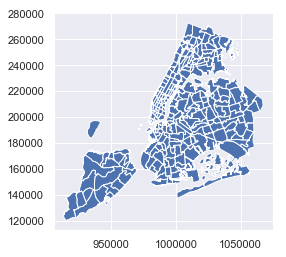

In [24]:
import matplotlib
%matplotlib inline
gdf.plot()



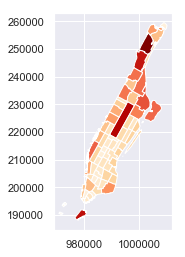

In [25]:
# Paint areas in region of Manhattan (the most of the taxi traffic)
gdf = gdf[(gdf.borough=="Manhattan")]
gdf.plot(column='Shape_Area', cmap='OrRd');

# TASK 3: MODEL BUILDING

# SELECTION OF A CLASSIFIER

Random Forests is a flexible, easy to use machine learning algorithm that produces great results. It can be used as regressor or classifier. It is a supervised learning algorithm. The forest it builds is an ensemble of decision trees trained with the bagging method. We can conclude that the combination of learning models increases the overall result.

In [26]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import cm as cmap

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc
from sklearn.preprocessing import LabelEncoder

sns.set(font='sans')

I will use classification in two classes taking into account the tip distribution obtained in the model description for credit card payment: bad tip ('0' label, 0-3 dollars) or good tip ('1' label, more that 3 dollars). In this sense there is higher probability of building a reliable model that with many classes or the values or the tips (regression). 

In [27]:

feature_columns = ['hpick','hdrop','month','duration','VendorID','passenger_count','trip_distance','RatecodeID','PULocationID','DOLocationID','fare_amount','extra','mta_tax','tolls_amount','improvement_surcharge','total_amount']
label_column = 'tip_amount'


In [34]:
class1 = ((data_aux[label_column] >= 0.0) & (data_aux[label_column] < 3))
class2 = (data_aux[label_column] >= 3.0) 

In [35]:
y=(data_aux[label_column] >= 0.0)
y[class1]='0'
y[class2]='1'

X=data_aux[feature_columns]

When analysing big datasets, it is important to reduce dimensionality. Principal component analysis is a well established mathematical technique for reducing the dimensionaliyty of data, while keeping as much variation as possible. I have used 10 components. Feature Ranking with Random Forest gini index would have been an interesting possibility to know which features are more correlated with a tip recommender tool.

In [64]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents,columns = ['1', '2','3','4','5','6','7','8','9','10'])


Train (70%) and test (30%) have been randomly selected from card data. 100 estimators for building the RF model.

In [65]:
from sklearn.model_selection import train_test_split


In [66]:

train, test, train_labels, test_labels = train_test_split(principalDf,
                                         y, 
                                         stratify = y,
                                         test_size = 0.3, 
                                         random_state = 42)

In [67]:
model = RandomForestClassifier(n_estimators=100, 
                               random_state=42, 
                               max_features = 'sqrt',
                               n_jobs=-1, verbose = 1)

In [68]:

model.fit(train, train_labels)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 43.6min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 102.1min finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=42, verbose=1, warm_start=False)

# MODEL PERFORMANCE

In the following, the performance of the algorithm is analysed. 98% of accuracy. As the classes are well ballanced, we can see a similar performance for recomending to the client if the taxi driver deserved a good tip or a bad tip (F1 score is a good indicative). We leave some flexibility to the client as a tip is always subjective.

In [74]:
y_pred=model.predict(test)
from sklearn import metrics
metrics.accuracy_score(test_labels, y_pred)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   32.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:  1.2min finished


0.9894676229944144

In [87]:
from pandas_ml import ConfusionMatrix
confusion_matrix = ConfusionMatrix(list(map(int, test_labels)), list(map(int, y_pred)))
confusion_matrix.print_stats()

population: 5527812
P: 1597665
N: 3930147
PositiveTest: 1594918
NegativeTest: 3932894
TP: 1567181
TN: 3902410
FP: 27737
FN: 30484
TPR: 0.9809196546209624
TNR: 0.9929425031684566
PPV: 0.9826091372722611
NPV: 0.99224896475725
FPR: 0.007057496831543451
FDR: 0.01739086272773898
FNR: 0.019080345379037533
ACC: 0.9894676229944144
F1_score: 0.9817636691042958
MCC: 2750.255927106552
informedness: 0.9738621577894189
markedness: 0.9748581020295111
prevalence: 0.28902303479206604
LRP: 138.98974070193646
LRN: 0.01921596196975413
DOR: 7233.0357918435675
FOR: 0.007751035242749995


/anaconda3/lib/python3.7/site-packages/pandas_ml/confusion_matrix/bcm.py:302: RuntimeWarning: overflow encountered in long_scalars
  * (self.TN + self.FP) * (self.TN + self.FN)))


# LIMITATIONS OR CAVEATS OF THE MODEL WHICH MIGHT BE AN ISSUE

this model created for the card sample size will be tested with the "cash" payment_type in which the tip is set to 0
(this could be a possible cause of fraud)

In [93]:
payment_type = (newdf.payment_type == 2) #payment_type=2 (cash) has a tip of 0 always, so it will add noise to the model
fare_amount = ((newdf.fare_amount >= 5.0) & (newdf.fare_amount <= 500.0))
surcharge = ((newdf.improvement_surcharge == 0.0) | (newdf.improvement_surcharge == 0.3))
mta_tax = (newdf.mta_tax == 0.5)
tip_amount = ((newdf.tip_amount >= 0.0) & (newdf.tip_amount <= 100.0))
tolls_amount = ((newdf.tolls_amount >= 0.0) & (newdf.tolls_amount <= 30.0))

data_cash = newdf[payment_type & fare_amount & surcharge & mta_tax & tip_amount & tolls_amount]

payment_type = None
fare_amount = None
surcharge = None
mta_tax = None
tip_amount = None
tolls_amount = None

feature_columns = ['hpick','hdrop','month','duration','VendorID','passenger_count','trip_distance','RatecodeID','PULocationID','DOLocationID','fare_amount','extra','mta_tax','tolls_amount','improvement_surcharge','total_amount']
label_column = 'tip_amount'
class1 = ((data_cash[label_column] >= 0.0) & (data_cash[label_column] < 3))
class2 = (data_cash[label_column] >= 3.0) 
ycash=(data_cash[label_column] >= 0.0)
ycash[class1]='0'
ycash[class2]='1'

testcash=data_cash[feature_columns]
pca = PCA(n_components=10)
principalComponentscash = pca.fit_transform(testcash)
principalDfcash = pd.DataFrame(data = principalComponentscash,columns = ['1', '2','3','4','5','6','7','8','9','10'])


In [94]:
predictionscash = model.predict(principalDfcash)

metrics.accuracy_score(ycash, predictionscash)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   29.5s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:  1.1min finished


0.6454601990356331

As expected, the accuracy for the cash model has decreased due to the fraud cases (and not just fraud, the taxi driver can not ask more money he deserved if the client is a bit miserly). By default the tip is "bad"(=0) for cash dataset. But the algorithm predicts that 35% of  tips should be good and it's not the case. Additionally, they are not being declared (fraud cases). Confusion matrix supports the accuracy results.

In [96]:
confusion_matrixcash = ConfusionMatrix(list(map(int, ycash)), list(map(int, predictionscash)))
confusion_matrixcash.print_stats()

Predicted    False     True  __all__
Actual                              
False      5237214  2876709  8113923
True             0        1        1
__all__    5237214  2876710  8113924

# POSSIBLE IMPROVEMENTS OF THE ALGORITHM

Some of the improvements have been commented during this analysis. For example, use more geolocation information to know the shorter trajectories between two points. Use calendar information: work days, holidays dates, weekends etc. Add more months and in the case of big data use new technologies as spark or cloudera etc. Study in depth the features we have, establish correlation analysis. Make some feature engineering, combine and create new KPIs that can improve models. Use different machine learning algorithms, for example deep learning to establish with more accuracy what could be a tip with more accuracy (than just good/bad tip). Improve models with label noise reduction, study fraud techniques based on anomaly detection. Use a semi supervised learning to predict non-labeled data (cash for example) etc etc 

# HOW TURN A MODEL INTO AN API THE COMPANY CAN USE

Training a machine learning model is a heavy task for a mobile device and not all ML libraries have APIs build for accessing the model stored on the mobile phone. 
The best possibility consists in using a Client-Server architecture where the trained model is stored on the server and the web server accepts requests from the client (taxi driver) which is the input for the model and the model predicts the response that is sent to the driver. Client can be a web browser or a mobile app (the latter i think is the best from the business point of view). In this case, GPS should be connected to the app to introduce automatically the features just pressing one button when the trip starts and ends.

-A way of making a model is as in the following:

1.Write the machine learning code. It can be a scikit-learn, Tensorflow, Keras, Theano or just using Numpy code, whatever you choose for the task.

2.Train the model on your system or any cloud.

3.Create a web server. You can use Flask/Django/php or any other framework.

     3.1. You loaded the dataset and selected the best features.
 
     3.2.You did the necessary data preprocessing.
 
     3.3.You built a RF classifier and serialized it.You also serialized all the columns from training as a solution to the less than expected number of columns is to persist the list of columns from training. I think this with an automatic connection to GPS could be solved automatically.
 
    3.4. You then wrote a simple API using Flask that would predict if a tip should be good or bad.

4.Store your model onto the server and extract input parameters from incoming requests and feed it to the model.

5.The model predicts the result which is sent back to the client.

